In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from collections import Counter
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.linear_model import ElasticNet

**Набор данных фондового рынка**


Этот набор данных содержит исторические данные фондового рынка для различных компаний, включая такие атрибуты, как:

1. Цена открытия;
2. Максимум цена;
3. Минимум цена;
4. Цена закрытия;
5. Скорректированная цена закрытия;
6. Объем торгов.

Он полезен для прогнозирования финансового рынка и анализа тенденций.

Источник набора данных : набор данных фондового рынка


Метки : Непрерывные значения для атрибутов, таких как цена закрытия (может быть целевой переменной).


Область применения : охватывает несколько компаний с такими атрибутами, как цена открытия, максимальная цена, минимальная цена, цена закрытия, объем торгов и скорректированная цена закрытия.


Размер : Обычно содержит от тысяч до миллионов записей в зависимости от набора данных.


Язык : N/A (числовые данные).

ШАГ 1.


Скачаем датасет и загрузим его в фрейм данных.

Распечатаем первые 5 строк.

In [ ]:
data = pd.read_excel("/content/yahoo_data[1].xlsx")
data.head(5)

,Open,High,Low,Close*,Adj Close**,Volume
0,33797.43,34104.56,33728.40,34098.16,34098.16,354310000
1,33381.66,33859.75,33374.65,33826.16,33826.16,343240000
2,33596.34,33645.83,33235.85,33301.87,33301.87,321170000
3,33828.34,33875.49,33525.39,33530.83,33530.83,297880000
4,33805.04,33891.15,33726.09,33875.40,33875.40,252020000


Проанализировав данные, сделаев вывод, что столбец Adj Close** нужно удалить, так как он очень близок по значениям к столбцу Close* - это может вызвать **утечку** данных, что отрицательно повлияет на качество модели.

In [ ]:
data=data.drop(['Adj Close**'],axis=1)

ШАГ 2.

Смотрим статистическую информацию о данных с помощью describe()

In [ ]:
data.describe()

,Open,High,Low,Close*,Volume
count,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03
mean,29595.823045,29776.945739,29402.432226,29599.361677,3.450636e+08
std,4006.078299,4009.007573,4004.949066,4007.468822,1.069142e+08
min,19028.360000,19121.010000,18213.650000,18591.930000,8.615000e+07
25%,26041.267500,26163.155000,25877.872500,26027.120000,2.773125e+08
50%,29201.410000,29335.685000,28996.500000,29199.460000,3.247250e+08
75%,33604.027500,33825.445000,33346.827500,33600.342500,3.875100e+08
max,36722.600000,36952.650000,36636.000000,36799.650000,9.159900e+08


ШАГ 3.

Смотрим количество пропусков в датасете

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1258 non-null   float64
 1   High    1258 non-null   float64
 2   Low     1258 non-null   float64
 3   Close*  1258 non-null   float64
 4   Volume  1258 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 49.3 KB


Видим, что пропусков нет

ШАГ 4.


Смотрим названия фичей. Количество строк мы смотрели выше, вызывав метод .head()

In [ ]:
data.columns

Index(['Open', 'High', 'Low', 'Close*', 'Volume'], dtype='object')

ШАГ 5.

Смотрим количество строк и столбцов в датасете

In [ ]:
data.shape

(1258, 5)

ШАГ 6.

Удалим из исходного датасета целевую переменную - цена закрытия

In [ ]:
y = data.pop('Close*')

In [ ]:
df = data

ШАГ 7.

Разделим исходный датасет на train и test в пропорциях (70/30)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    df, y, test_size=0.3, random_state=17, shuffle=True
)

ЩАГ 8.

Нормализуем данные.

Используем MinMaxScaler, так как с ним метрики становятся лучше во всех моделях, по сравнению с StandartScaler

In [ ]:
scaler =  MinMaxScaler()
df_scaled_train = scaler.fit_transform(X_train)
df_scaled_test = scaler.fit_transform(X_test)

Опишем функцию, которую будем применять для расчета всех нужных метрик:

RNSE

R2

Adjusted R2

Cross Validated R2

In [ ]:
def Reg_Models_Evaluation_Metrics (model,X_train,y_train,X_test,y_test,y_pred):
    cv_score = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 10)

    # Calculating Adjusted R-squared
    r2 = model.score(X_test, y_test)
    # Number of observations is the shape along axis 0
    n = X_test.shape[0]
    # Number of features (predictors, p) is the shape along axis 1
    p = X_test.shape[1]
    # Adjusted R-squared formula
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    R2 = model.score(X_test, y_test)
    CV_R2 = cv_score.mean()

    print(f'RMSE:  {round(RMSE,4)}\n  R2: {round(R2,4)}\n Adjusted R2: {round(adjusted_r2, 4)}\n Cross Validated R2: {round(cv_score.mean(),4)}')
    return R2, adjusted_r2, CV_R2, RMSE

**Применим модели:**

Линейная регрессия


Полиномиальная регрессия


Деревья принятия решений


Случайный лес


Метод опорных векторов


ElasticNet


Градиентный бустинг

Затем выберем лучшие модели и визуализируем результаты

In [ ]:
#Линейная регрессия
modelLR = LinearRegression()
modelLR.fit(df_scaled_train, y_train)
y_pr_LR = modelLR.predict(df_scaled_test)
_ = Reg_Models_Evaluation_Metrics(modelLR, df_scaled_train, y_train, df_scaled_test, y_test, y_pr_LR)

RMSE:  440.1706
  R2: 0.988
 Adjusted R2: 0.9878
 Cross Validated R2: 0.9989


In [ ]:
#Полиномиальная регрессия
poly = PolynomialFeatures(degree=3, include_bias=False)
poly_features_train = poly.fit_transform(df_scaled_train)
poly_features_test = poly.fit_transform(df_scaled_test)

modelPR = LinearRegression()
modelPR.fit(poly_features_train, y_train)
y_pr_PR = modelPR.predict(poly_features_test)
_ = Reg_Models_Evaluation_Metrics(modelPR, poly_features_train, y_train, poly_features_test, y_test, y_pr_PR)

RMSE:  425.7642
  R2: 0.9887
 Adjusted R2: 0.9876
 Cross Validated R2: 0.9979


In [ ]:
#Деревья принятия решений
modelDT = DecisionTreeRegressor()
modelDT.fit(df_scaled_train, y_train)
y_dt_pred = modelDT.predict(df_scaled_test)
_ = Reg_Models_Evaluation_Metrics(modelDT, df_scaled_train, y_train, df_scaled_test, y_test, y_dt_pred)

RMSE:  465.3505
  R2: 0.9865
 Adjusted R2: 0.9864
 Cross Validated R2: 0.9966


In [ ]:
#Случайный лес
modelRF = RandomForestRegressor(n_estimators=100)
modelRF.fit(df_scaled_train, y_train)
y_rf_pred = modelRF.predict(df_scaled_test)
_ = Reg_Models_Evaluation_Metrics(modelRF, df_scaled_train, y_train, df_scaled_test, y_test, y_rf_pred)

RMSE:  412.5044
  R2: 0.9894
 Adjusted R2: 0.9893
 Cross Validated R2: 0.9979


In [ ]:
#Метод опорных векторов
modelSVR = SVR(kernel='poly')
modelSVR.fit(df_scaled_train, y_train)
y_svr_pred = modelSVR.predict(df_scaled_test)
_ = Reg_Models_Evaluation_Metrics(modelSVR, df_scaled_train, y_train, df_scaled_test, y_test, y_svr_pred)

RMSE:  1123.2606
  R2: 0.9216
 Adjusted R2: 0.9207
 Cross Validated R2: 0.9311


In [ ]:
#ElasticNet
modelEN = ElasticNet(alpha=0.1, l1_ratio=0.8)
modelEN.fit(df_scaled_train, y_train)
y_en_pred = modelEN.predict(df_scaled_test)
_ = Reg_Models_Evaluation_Metrics(modelEN, df_scaled_train, y_train, df_scaled_test, y_test, y_en_pred)

RMSE:  708.3608
  R2: 0.9688
 Adjusted R2: 0.9685
 Cross Validated R2: 0.9861


In [ ]:
#Градиентный бустинг
modelGBR = GradientBoostingRegressor(random_state=0)
modelGBR.fit(df_scaled_train, y_train)
y_gbr_pred = modelGBR.predict(df_scaled_test)
_ = Reg_Models_Evaluation_Metrics(modelGBR, df_scaled_train, y_train, df_scaled_test, y_test, y_gbr_pred)

RMSE:  421.0055
  R2: 0.989
 Adjusted R2: 0.9889
 Cross Validated R2: 0.9977


Метрики получены отличные на всех моделях, однако лучшие - Случайный лес и Градиентный бустинг

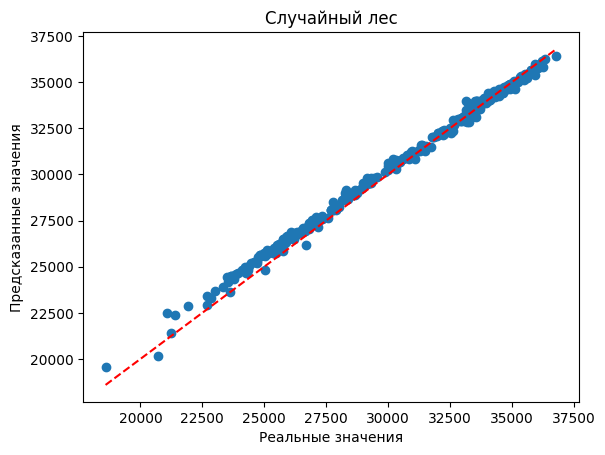

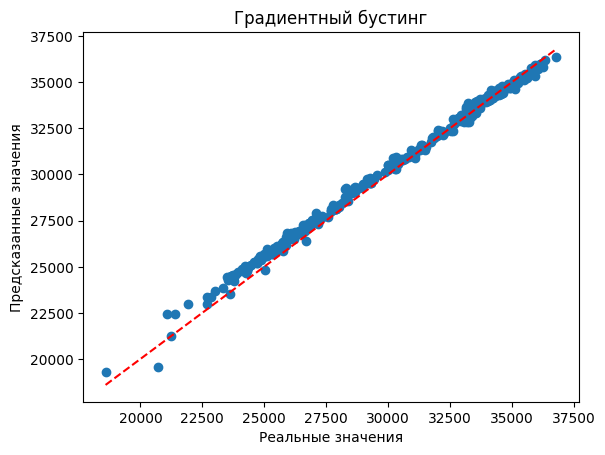

In [ ]:
plt.scatter(y_test, y_rf_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Реальные значения')
plt.ylabel('Предсказанные значения')
plt.title('Случайный лес')
plt.show()

plt.scatter(y_test, y_gbr_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Реальные значения')
plt.ylabel('Предсказанные значения')
plt.title('Градиентный бустинг')
plt.show()

Визуализируем зависимость между одним из параметров и целевой переменной

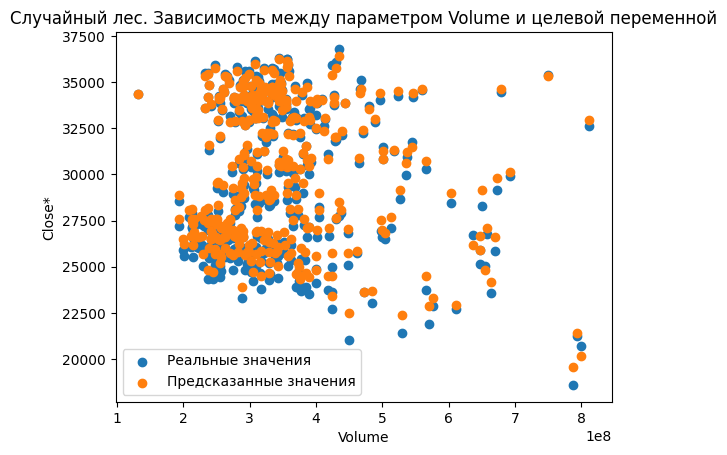

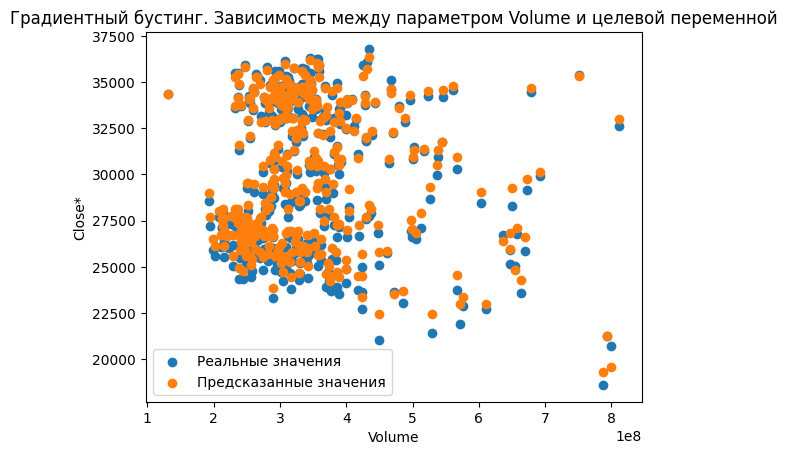

In [ ]:
plt.scatter(X_test['Volume'], y_test, label='Реальные значения')
plt.scatter(X_test['Volume'], y_rf_pred, label='Предсказанные значения')
plt.xlabel('Volume')
plt.ylabel('Close*')
plt.title('Случайный лес. Зависимость между параметром Volume и целевой переменной')
plt.legend()
plt.show()

plt.scatter(X_test['Volume'], y_test, label='Реальные значения')
plt.scatter(X_test['Volume'], y_gbr_pred, label='Предсказанные значения')
plt.xlabel('Volume')
plt.ylabel('Close*')
plt.title('Градиентный бустинг. Зависимость между параметром Volume и целевой переменной')
plt.legend()
plt.show()